Important for Interview
# Assumptions of Linear Regression

## Linear Relationship
Linear regression needs a linear relationship between independent and dependent variables, if x changes it should give a proportionate change to y.
It is also important to have a good correlation between your x and y variable.
Its important to check outliers before building linear regression models, since linear models are very sensitive to outliers.
The linearity assumption can be tested via boxplot, scatterplot and z-score.

## Multicollinearity
Linear Regression assumes there should be little or no multicollinearity in the data. Multicollinearity occurs when 2 or more than 2 independent variables are too highly correlated with each other.
- Correlation
- Tolerance
- VIF (variance inflation factor) score should be <= 4

## Homoscedasticity
THe last assumption of linear regression is Homoscedasticity, means there should be no such pattern in the residuals.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as sc
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('car-mpg_students.csv')
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    int64  
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(6), object(1)
memory usage: 31.2+ KB


In [4]:
df.shape

(398, 10)

In [5]:
for i in df.columns:
    print(i)

mpg
cyl
disp
hp
wt
acc
yr
origin
car_type
car_name


In [6]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,103.241206,2970.424623,15.568090,76.010050,1.572864,0.530151
std,7.815984,1.701004,104.269838,39.471217,846.841774,2.757689,3.697627,0.802055,0.499718
min,9.000000,3.000000,68.000000,23.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


In [5]:
# checking duplicates if yes then count
 dc = df[df.duplicated('car_name')]
dc

SyntaxError: invalid syntax (<ipython-input-5-3dc38e393b4b>, line 1)

In [8]:
nl = df.isnull()
nl

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False


In [9]:
# udf to print all complete descriptive stat for continous variables.
def desc_stat(f):
    for col in df.columns:
        if df[col].dtype == 'int64' or df[col].dtype == 'float64':
            print('Descriptive statistics: ', col)
            print(round(df[col].describe(),2))
            print('variance is - ',round(df[col].var(),2))
            print('stdev is - ',round(df[col].std(),2))
            print('kurtosis is - ',round(df[col].kurt(),2))
            print('skewness is - ',round(df[col].skew(),2))
            print(' ')
            print('----------------------------------------')

In [10]:
desc_stat(df)

Descriptive statistics:  mpg
count    398.00
mean      23.51
std        7.82
min        9.00
25%       17.50
50%       23.00
75%       29.00
max       46.60
Name: mpg, dtype: float64
variance is -  61.09
stdev is -  7.82
kurtosis is -  -0.51
skewness is -  0.46
 
----------------------------------------
Descriptive statistics:  cyl
count    398.00
mean       5.45
std        1.70
min        3.00
25%        4.00
50%        4.00
75%        8.00
max        8.00
Name: cyl, dtype: float64
variance is -  2.89
stdev is -  1.7
kurtosis is -  -1.38
skewness is -  0.53
 
----------------------------------------
Descriptive statistics:  disp
count    398.00
mean     193.43
std      104.27
min       68.00
25%      104.25
50%      148.50
75%      262.00
max      455.00
Name: disp, dtype: float64
variance is -  10872.2
stdev is -  104.27
kurtosis is -  -0.75
skewness is -  0.72
 
----------------------------------------
Descriptive statistics:  hp
count    398.00
mean     103.24
std       39.47
min  

In [11]:
#UDF for checking distribution of data
def plot_graph(df,col):
    col_mean = df[col].mean()
    col_median = df[col].median()
    col_mode = df[col].mode()
    
    fig, ax_hist = plt.subplots(figsize = (10,6)) #fig is outlay for figure object
    ax_hist = sns.distplot(df[col])
    
    ax_hist.axvline(col_mean, color = 'r', linestyle = '--', label = 'mean');
    ax_hist.axvline(col_median, color = 'b', linestyle = '--', label = 'median');
    ax_hist.axvline(col_mode[0], color = 'y', linestyle = '--', label = 'mode');
    
    plt.legend()
    plt.show()

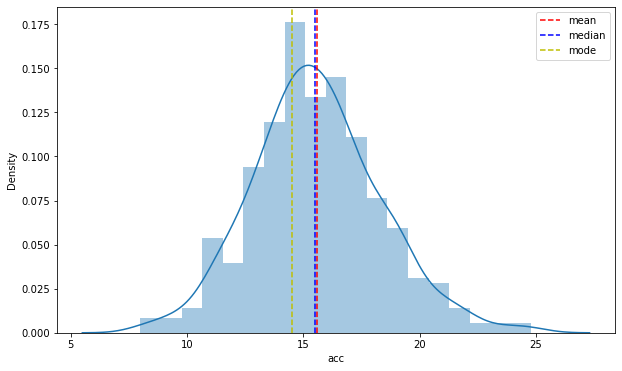

In [12]:
plot_graph(df,'acc')

In [13]:
df = df.drop(['car_name'], axis = 1)
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [14]:
from collections import OrderedDict
def summary(df):
    result = []
    for col in list(df.columns):
        
#         if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        stats = OrderedDict({'colname':col,
                            'count':df[col].count(),
                            'datatype':df[col].dtype,
                            'min':df[col].min(),
                            'Q1': df[col].quantile(0.25),
                            'mean':df[col].mean(),
                            'median':df[col].quantile(0.50),
                            'Q3':df[col].quantile(0.75),
                            'max':df[col].max(),
                            'variance':df[col].var(),
                            'stdev':df[col].std(),
                            'skewness':df[col].skew(),
                            'kurtosis':df[col].kurt(),
                            'Range':df[col].max() - df[col].min(),
                                'IQR':df[col].quantile(0.75) - df[col].quantile(0.25)})
        result.append(stats)
        
#for skewness
        if df[col].skew() <= -1:
            label = "Highly negative skewed"
        elif -1 <= df[col] .skew() <0.5:
            label = "Moderately negative skewed"
        elif -0.5 <= df[col].skew() <0:
            label = "Fairly symmetric (negative)"
        elif 0 <= df[col].skew() <0.5:
            label = "Fairly symmetric (positive)"
        elif 0.5 <= df[col].skew() <1:
            label = "Moderately positive skewed"
        elif df[col].skew() >1:
            label = "Highly positive skewed"
        else:
            label = "Error"
            
        stats['skewness comment'] = label


# comments for outliers
        upperlimit = stats['Q3'] + (1.5 * stats['IQR'])
        lowerlimit = stats['Q1'] - (1.5 * stats['IQR'])
        if len([x for x in df[col] if x < lowerlimit or x > upperlimit]) > 0:
            outlier_label = 'Has outlier'
        else:
            outlier_label = 'No outliers'
            
        stats['outlier comment'] = outlier_label
    resultdf = pd.DataFrame(data = result)
    return resultdf

In [15]:
summary(df)

,colname,count,datatype,min,Q1,mean,median,Q3,max,variance,stdev,skewness,kurtosis,Range,IQR,skewness comment,outlier comment
0,mpg,398,float64,9.0,17.500,23.514573,23.0,29.000,46.6,61.089611,7.815984,0.457066,-0.510781,37.6,11.50,Moderately negative skewed,Has outlier
1,cyl,398,int64,3.0,4.000,5.454774,4.0,8.000,8.0,2.893415,1.701004,0.526922,-1.376662,5.0,4.00,Moderately positive skewed,No outliers
2,disp,398,float64,68.0,104.250,193.425879,148.5,262.000,455.0,10872.199152,104.269838,0.719645,-0.746597,387.0,157.75,Moderately positive skewed,No outliers
3,hp,398,int64,23.0,75.000,103.241206,92.0,125.000,230.0,1557.976938,39.471217,0.953296,0.682171,207.0,50.00,Moderately positive skewed,Has outlier
4,wt,398,int64,1613.0,2223.750,2970.424623,2803.5,3608.000,5140.0,717140.990526,846.841774,0.531063,-0.785529,3527.0,1384.25,Moderately positive skewed,No outliers
5,acc,398,float64,8.0,13.825,15.568090,15.5,17.175,24.8,7.604848,2.757689,0.278777,0.419497,16.8,3.35,Moderately negative skewed,Has outlier
6,yr,398,int64,70.0,73.000,76.010050,76.0,79.000,82.0,13.672443,3.697627,0.011535,-1.181232,12.0,6.00,Moderately negative skewed,No outliers
7,origin,398,int64,1.0,1.000,1.572864,1.0,2.000,3.0,0.643292,0.802055,0.923776,-0.817597,2.0,1.00,Moderately positive skewed,No outliers
8,car_type,398,int64,0.0,0.000,0.530151,1.0,1.000,1.0,0.249718,0.499718,-0.121280,-1.995343,1.0,1.00,Moderately negative skewed,No outliers


In [16]:
def outlier_treatment (data, col, method = 'Std', strategy = 'Mean'):
    coldata = data[col]
    
    if method == 'Quartile':
        median = coldata.median()
        Q1 = coldata.quantile(0.25)
        Q3 = coldata.quantile(0.75)
        IQR = Q3-Q1
        Upperlimit = Q3 + (1.5*IQR)
        Lowerlimit = Q1 - (1.5*IQR)
        
    
    elif method == 'Std':
        colmean = coldata.mean()
        colstd = coldata.std()
        cutoff = colstd*2  #It covers the approx 95 % of data
        Upperlimit = colmean + cutoff
        Lowerlimit = colmean - cutoff
        
    else:
        print('Invalid method')
        
    if strategy == 'Mean':
        data.loc[(coldata < Lowerlimit) | (coldata > Upperlimit), col] = colmean
    elif strategy == 'Median':
        data.loc[(coldata < Lowerlimit) | (coldata > Upperlimit), col] = median
    return data

In [19]:
def odt_plots(df,col):
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,4))
    #Boxplot with outliers
    kwargs = {'fontsize':10, 'color':'black'}  #keyword arguments
    sns.boxplot(df[col], ax = ax1, color = 'b')
    ax1.set_title('Boxplot for '+col, **kwargs) #** to pass inbuilt fns.
    ax1.set_xlabel('Values',**kwargs)
    ax1.set_ylabel('Boxplot distribution',**kwargs)
    
    #Histogram with outliers
    sns.distplot(df[col], ax = ax2, color = 'r',fit = sc.norm)
    ax2.set_title('Histogram for '+col, **kwargs) #** to pass inbuilt fns.
    ax2.set_xlabel('Values',**kwargs)
    ax2.set_ylabel('Histogram',**kwargs)
    
    #Histogram without outliers
    y = outlier_treatment(df, col)
    sns.distplot(y[col], ax = ax3, color = 'y')
    ax3.set_title('Histogram for '+col, **kwargs) #** to pass inbuilt fns.
    ax3.set_xlabel('Values',**kwargs)
    ax3.set_ylabel('Histogram',**kwargs)

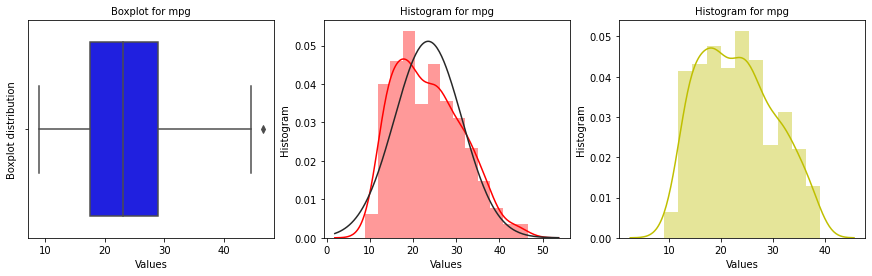

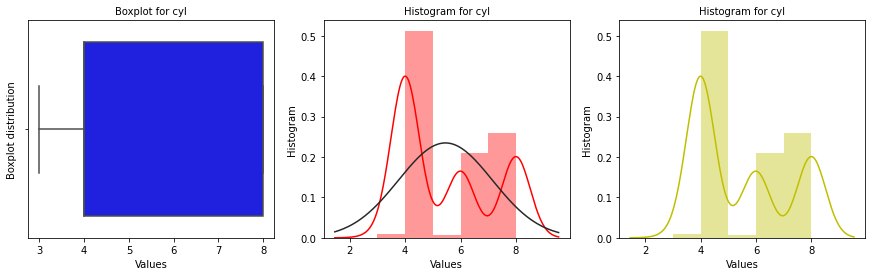

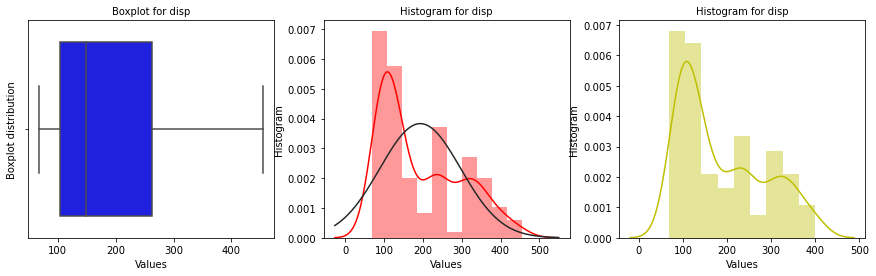

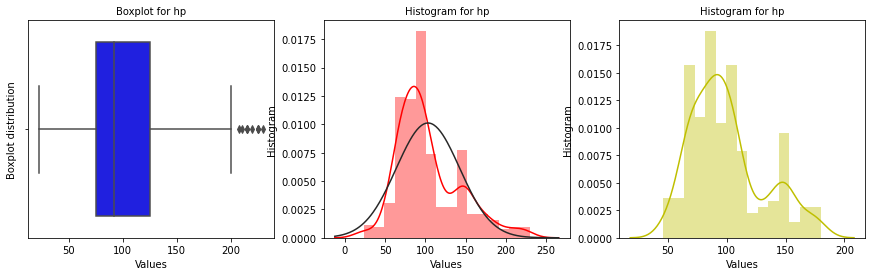

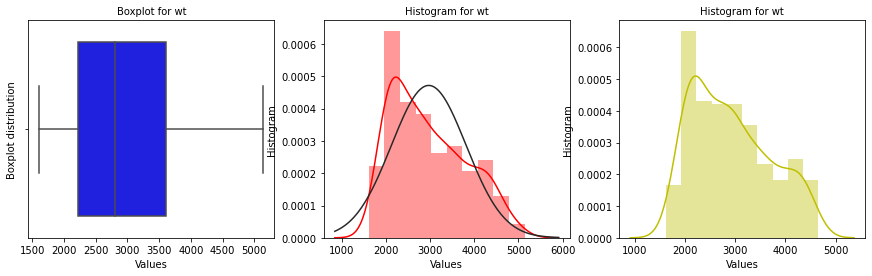

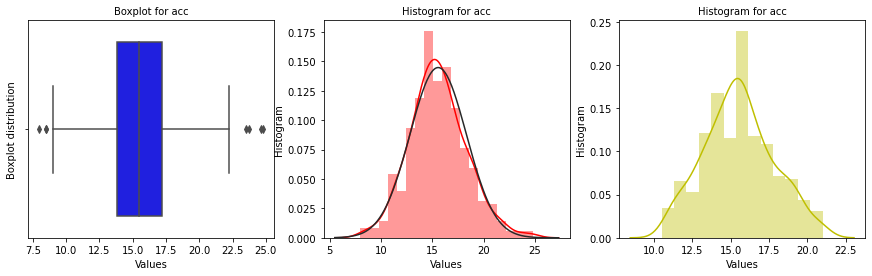

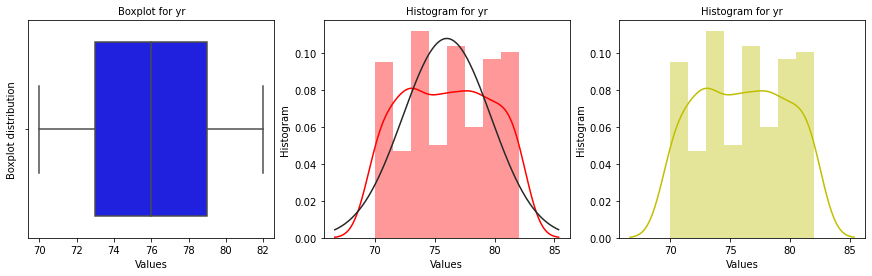

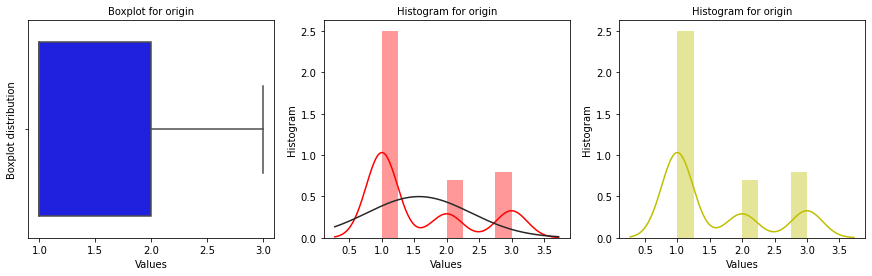

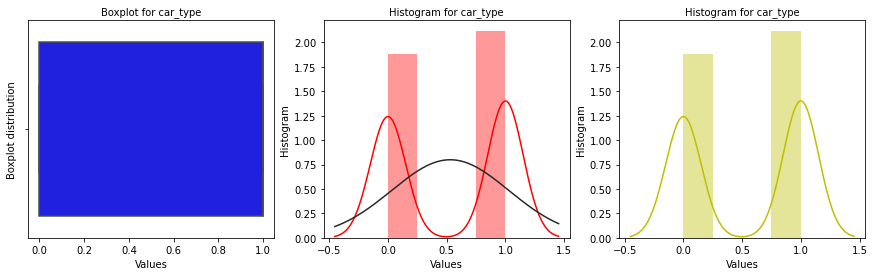

In [20]:
for col in df.columns:
    odt_plots(df,col)